# PCA

En este notebook vamos a ver el método de PCA utilizando la librería de python sklearn.

## instalación de librerias
* scikit-learn
* matplotlib
* pandas

## Teoría
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

## Dataset iris
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
from sklearn.datasets import load_iris
ds = load_iris()
X = ds.data
target = ds.target

In [10]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Estandarización

In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## PCA

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
target = pd.Series(target, name="target")
finalDf = pd.concat([principalDf, target], axis = 1)

In [7]:
finalDf

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


## Visualizacion

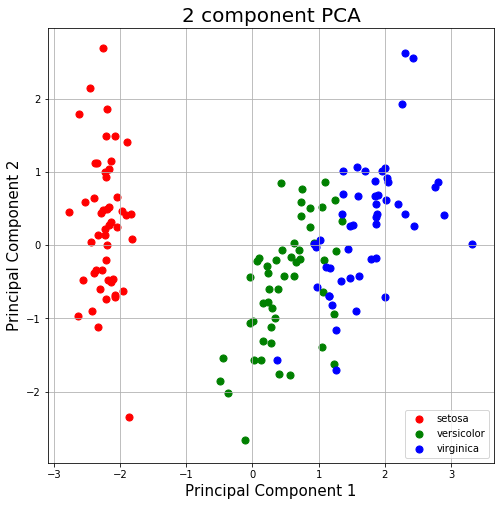

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(ds.target_names)
ax.grid()